In [3]:
# this demo show how to do a general search for similar images\
# this demo is setup using python2.7, and may work for 3.
# Follow demo: https://help.aliyun.com/document_detail/113827.html?spm=a2c4g.11186623.6.583.40b75ee7HFuZP3

# setup envionrmnet
#! python2 -m pip install aliyun-python-sdk-imagesearch
#! python2 -m pip install pillow




In [4]:
# credential is setup in a seperate shell : export ... = ...
import os
accessKeyId= os.environ['accessKeyId']
accessKeySecret= os.environ['accessKeySecret']


In [5]:
#from IPython.display 
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from IPython.display import display
from IPython.core.display import HTML 
import json
from pprint import pprint
import os
import time
#import md5
import hashlib


from aliyunsdkcore.profile import region_provider
from aliyunsdkcore.client import AcsClient
import base64
import aliyunsdkimagesearch.request.v20190325.AddImageRequest as AddImageRequest
import aliyunsdkimagesearch.request.v20190325.DeleteImageRequest as DeleteImageRequest
import aliyunsdkimagesearch.request.v20190325.SearchImageRequest as SearchImageRequest

# import ali_config

product = "ImageSearch"
region =   'cn-shanghai' # , ap-southeast-1(sg)


domain = 'imagesearch.cn-shanghai.aliyuncs.com' # 
endpoint = 'imagesearch.cn-shanghai.aliyuncs.com' # 

instanceName = "duanimagesearch1"

region_provider.add_endpoint(product, region, domain)
client  = AcsClient(accessKeyId, accessKeySecret, region)
requestClient = client

image_name = '1.jpg' # 'tower_rail_aluminum.jpg'
image_folder = './image1' # '/Users/qiyang/Documents/qduan/work/projects/Grafton/prod_images'
image_path = os.path.abspath(image_folder+'/'+image_name)



In [6]:
def get_md5(txt):
    #return md5.new(txt).digest()
    return hashlib.sha224(txt).hexdigest()
def image_preview(image_path, box, cate):
    #img1 = Image(filename = image_path, width=100, height=100)
    img1 = Image.open(image_path)
    if box is not None and box != '':
        draw = ImageDraw.Draw(img1)
        bb = box.split(",")
        x0 = float(bb[0])
        y0 = float(bb[2])
        x1 = float(bb[1])
        x2 = float(bb[3])
        draw.rectangle([(x0, y0), (x1, x2)], outline='red')
        if cate is not None and cate != "":
            draw.text((x0, y0), cate, fill="red")
    img = img1
    return img
def image_preview(image_path, box, cate):
    #img1 = Image(filename = image_path, width=100, height=100)
    img1 = Image.open(image_path)
    if box is not None and box != '':
        draw = ImageDraw.Draw(img1)
        bb = box.split(",")
        x0 = float(bb[0])
        y0 = float(bb[2])
        x1 = float(bb[1])
        x2 = float(bb[3])
        draw.rectangle([(x0, y0), (x1, x2)], outline='red')
        if cate is not None and cate != "":
            draw.text((x0, y0), cate, fill="red")
    img = img1
    return img

In [7]:
# function to upload image into alibaba cloud

In [8]:
from aliyunsdkimagesearch.request.v20190325.AddImageRequest import AddImageRequest as AddItemRequest

def get_Piccontent_from_file(image_path):
    file_object = open(image_path)
    file_content = None
    try:
        file_content1 = file_object.read()
        
        import base64
        file_content = base64.b64encode(file_content1) # ('data to be encoded') 
        # data = base64.b64decode(encoded)
 

    finally:
        file_object.close()
        
    return file_content
        
def image_upload(instanceName, ProductId, image_name, image_path):
    # load file 
    request = AddImageRequest.AddImageRequest()
    request.set_endpoint(endpoint)
    request.set_InstanceName(instanceName)
    request.set_CustomContent(image_path)
    request.set_ProductId(ProductId)
    request.set_PicName(image_name)
    with open(image_path, 'rb') as imgfile:
        encoded_pic_content = base64.b64encode(imgfile.read())
        request.set_PicContent(encoded_pic_content)
    response = client.do_action_with_exception(request)
    # print(response)

    return response


In [10]:

# test to upload a single image

#instanceName = "testforbcgeneral"; # e.g. imagesearchtest
image_path = os.path.abspath(image_folder+'/'+image_name)
result = image_upload( instanceName, image_name, image_name, image_path)
print(image_path, result)

('/Users/qiyang/Documents/qduan/work/git/temp/AlibabaCloud_ImageSearch_Demo_py2/image1/1.jpg', '{"PicInfo":{"Region":"103,196,8,294","CategoryId":8},"Message":"success","RequestId":"B1DE4133-0E30-44C4-B464-9CEBDBBC63FF","Success":true,"Code":0}')


In [11]:
# test to upload a list of image

import os
import time
from pprint import pprint


images = {}
for file in os.listdir(image_folder):
    if file.endswith(".jpg") or file.endswith(".png"):
        image_path = os.path.join(image_folder, file)
        # print(os.path.abspath(image_path))
        images[image_path] = file

# pprint(images)

for image_path in images:
    image_name = images[image_path]
    result = image_upload(instanceName, image_name, image_name, image_path)
    print(instanceName,  image_name, image_path, result)
    time.sleep(1)

('duanimagesearch1', '3.png', './image1/3.png', '{"PicInfo":{"Region":"70,149,3,219","CategoryId":8},"Message":"success","RequestId":"38B3F075-3412-4AED-B1F7-FFDAE9CBD664","Success":true,"Code":0}')
('duanimagesearch1', '2.jpg', './image1/2.jpg', '{"PicInfo":{"Region":"50,168,3,212","CategoryId":88888888},"Message":"success","RequestId":"84357403-E4BD-41D3-BCEA-EDA66BF0D0E3","Success":true,"Code":0}')
('duanimagesearch1', '1.jpg', './image1/1.jpg', '{"PicInfo":{"Region":"103,196,8,294","CategoryId":8},"Message":"success","RequestId":"E3C06739-1BBE-4B98-81BF-55D92D188898","Success":true,"Code":0}')
('duanimagesearch1', 'hanger-2rail.png', './image1/hanger-2rail.png', '{"PicInfo":{"Region":"1,766,261,494","CategoryId":20},"Message":"success","RequestId":"45AFBE8F-29FD-4F8E-9B52-2A21D737E2C6","Success":true,"Code":0}')


In [13]:
# function to search for image in alibaba cloud

In [12]:
request = SearchImageRequest.SearchImageRequest()
request.set_endpoint('imagesearch.cn-shanghai.aliyuncs.com')
request.set_InstanceName("duanimagesearch1")
image_path = os.path.abspath(image_folder+'/'+'hanger-2rail.png')
 


with open(image_path, 'rb') as imgfile:
    encoded_pic_content = base64.b64encode(imgfile.read())
    request.set_PicContent(encoded_pic_content)
response = requestClient.do_action_with_exception(request)
# print(response)
print( json.dumps(json.loads(response)["Auctions"], sort_keys=True, indent=2) )

[
  {
    "CategoryId": 20, 
    "CustomContent": "./image1/hanger-2rail.png", 
    "PicName": "hanger-2rail.png", 
    "ProductId": "hanger-2rail.png", 
    "SortExprValues": "5.37633353624177e+24;0"
  }, 
  {
    "CategoryId": 20, 
    "CustomContent": "/Users/qiyang/Documents/qduan/work/projects/Grafton/prod_images/hanger2860191285.png", 
    "PicName": "hanger2860191285.png", 
    "ProductId": "hanger2860191285.png", 
    "SortExprValues": "11.9103527069092;102"
  }, 
  {
    "CategoryId": 20, 
    "CustomContent": "/Users/qiyang/Documents/qduan/work/projects/Grafton/prod_images/hinge_3holes.jpg", 
    "PicName": "hinge_3holes.jpg", 
    "ProductId": "hinge_3holes.jpg", 
    "SortExprValues": "3.08464670181274;235"
  }, 
  {
    "CategoryId": 20, 
    "CustomContent": "/Users/qiyang/Documents/qduan/work/projects/Grafton/prod_images/hinges.jpg", 
    "PicName": "hinges.jpg", 
    "ProductId": "hinges.jpg", 
    "SortExprValues": "2.78657937049866;244"
  }
]


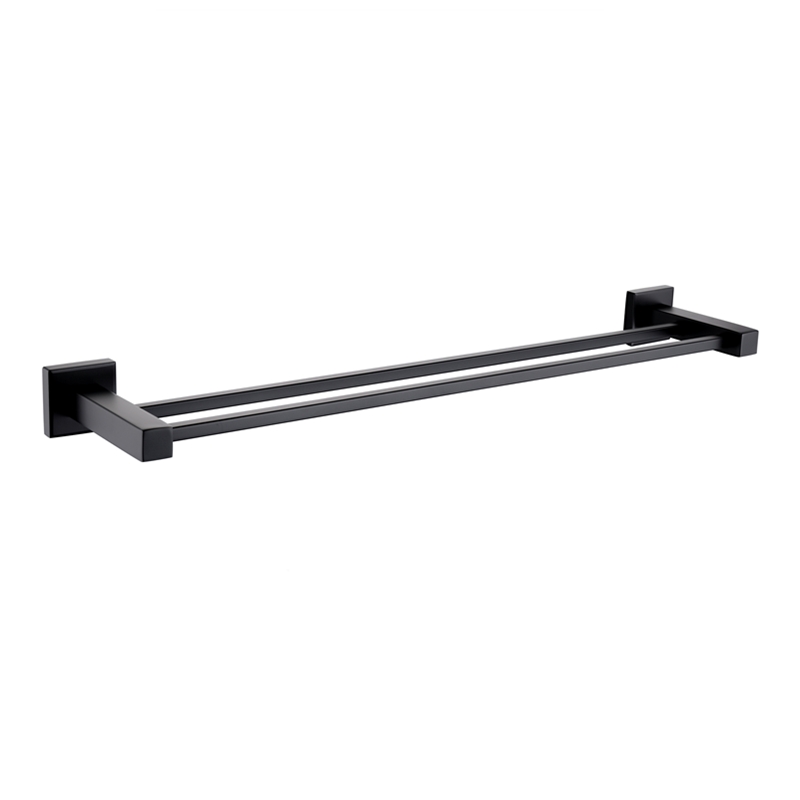

In [14]:
r = json.loads(response)
image_similar_path = r['Auctions'] [0]['CustomContent'] 
display (image_preview(image_similar_path, '', ''))

In [15]:
request = DeleteImageRequest.DeleteImageRequest()
request.set_endpoint('imagesearch.cn-shanghai.aliyuncs.com')
request.set_InstanceName("duanimagesearch1")
request.set_ProductId("1")
response = client.do_action_with_exception(request)
print(response)

{"Message":"success","RequestId":"42532014-BF3A-4167-998D-6FAF1D0B09EF","Success":true,"Code":0}
